<a href="https://colab.research.google.com/github/umabubakar16/movie-review/blob/main/rt_cnn_sentiment_analysis%201st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install preprocessor
import pandas as pd
import tensorflow as tf
import re
import nltk
import preprocessor as p
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import pickle


  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=38cf5cc08b36f0c45e72fe3e7cf88e6aaae48156115b07de5697035bece20abd
  Stored in directory: /root/.cache/pip/wheels/b6/26/c1/ce3fdf93e63c11019da18dbeec4c09309d3edc5461c2a5fffb
Successfully built preprocessor


In [ ]:
df_rt = pd.read_csv('/content/drive/My Drive//SCT/Thesis/rotten tomato.csv')
df_rt.head()

,review,sentiment
0,"simplistic , silly and tedious .",negative
1,"it's so laddish and juvenile , only teenage bo...",negative
2,exploitative and largely devoid of the depth o...,negative
3,[garbus] discards the potential for pathologic...,negative
4,a visually flashy but narratively opaque and e...,negative


In [ ]:
df_imdb = pd.read_csv('/content/drive/My Drive//SCT/Thesis/IMDB Dataset.csv')
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


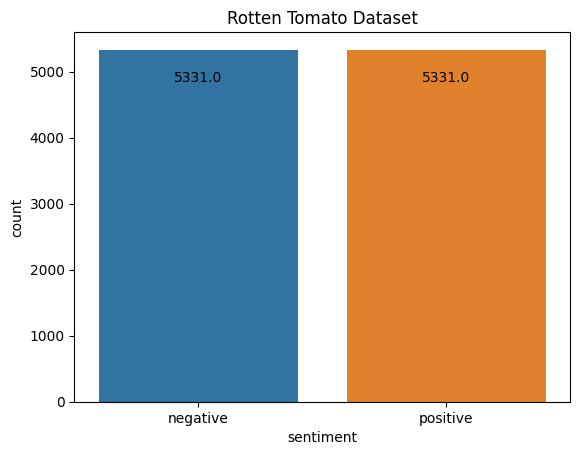

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example data
plt.close("all")

# Create countplot
ax = sns.countplot(x="sentiment", data=df_rt)

# Add count values to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, -20),
                textcoords = 'offset points')

# give the name to plot
plt.title('Rotten Tomato Dataset')
plt.show()

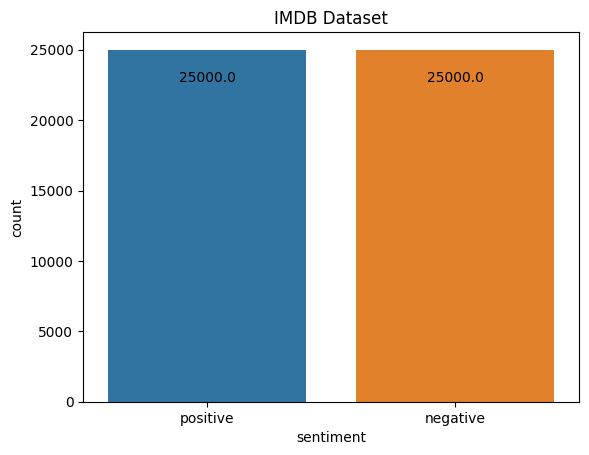

In [ ]:
plt.close("all")

# Create countplot
ax = sns.countplot(x="sentiment", data=df_imdb)

# Add count values to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, -20),
                textcoords = 'offset points')

# give the name to plot
plt.title('IMDB Dataset')
plt.show()

# Data preprocessing

In [ ]:
import os

# Define the directory you want to create
directory = './models/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
# Transforming abbreviations
abbreviations = {
    u"he's": "he is",
    u"there's": "there is",
    u"We're": "We are",
    u"That's": "That is",
    u"won't": "will not",
    u"they're": "they are",
    u"Can't": "Cannot",
    u"wasn't": "was not",
    u"don\x89Ûªt": "do not",
    u"aren't": "are not",
    u"isn't": "is not",
    u"What's": "What is",
    u"haven't": "have not",
    u"hasn't": "has not",
    u"There's": "There is",
    u"He's": "He is",
    u"It's": "It is",
    u"You're": "You are",
    u"I'M": "I am",
    u"shouldn't": "should not",
    u"wouldn't": "would not",
    u"i'm": "I am",
    u"I\x89Ûªm": "I am",
    u"I'm": "I am",
    u"Isn't": "is not",
    u"Here's": "Here is",
    u"you've": "you have",
    u"you\x89Ûªve": "you have",
    u"we're": "we are",
    u"what's": "what is",
    u"couldn't": "could not",
    u"we've": "we have",
    u"it\x89Ûªs": "it is",
    u"doesn\x89Ûªt": "does not",
    u"It\x89Ûªs": "It is",
    u"Here\x89Ûªs": "Here is",
    u"who's": "who is",
    u"I\x89Ûªve": "I have",
    u"y'all": "you all",
    u"can\x89Ûªt": "cannot",
    u"would've": "would have",
    u"it'll": "it will",
    u"we'll": "we will",
    u"wouldn\x89Ûªt": "would not",
    u"We've": "We have",
    u"he'll": "he will",
    u"Y'all": "You all",
    u"Weren't": "Were not",
    u"Didn't": "Did not",
    u"they'll": "they will",
    u"they'd": "they would",
    u"DON'T": "DO NOT",
    u"That\x89Ûªs": "That is",
    u"they've": "they have",
    u"i'd": "I would",
    u"should've": "should have",
    u"You\x89Ûªre": "You are",
    u"where's": "where is",
    u"Don\x89Ûªt": "Do not",
    u"we'd": "we would",
    u"i'll": "I will",
    u"weren't": "were not",
    u"They're": "They are",
    u"Can\x89Ûªt": "Cannot",
    u"you\x89Ûªll": "you will",
    u"I\x89Ûªd": "I would",
    u"let's": "let us",
    u"it's": "it is",
    u"can't": "cannot",
    u"don't": "do not",
    u"you're": "you are",
    u"i've": "I have",
    u"that's": "that is",
    u"i'll": "I will",
    u"doesn't": "does not",
    u"i'd": "I would",
    u"didn't": "did not",
    u"ain't": "am not",
    u"you'll": "you will",
    u"I've": "I have",
    u"Don't": "do not",
    u"I'll": "I will",
    u"I'd": "I would",
    u"Let's": "Let us",
    u"you'd": "You would",
    u"It's": "It is",
    u"Ain't": "am not",
    u"Haven't": "Have not",
    u"Could've": "Could have",
    u"youve": "you have",
    u"donå«t": "do not",
}

def transform_abb(text):
    for emot in abbreviations:
        text = re.sub(u'('+emot+')', " ".join(abbreviations[emot].replace(",","").split()), text)
    return text

In [ ]:
import nltk
stop_words = ['a', 'about', 'above', 'after', 'again', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'd', 'did', 'do', 'does', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'hasn', 'have', 'having', 'he', "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', "she's", 'should', "should've", 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', 'this', 'those', 'through', 'to', 'under', 'until', 'up', 've', 'was', 'wasn', 'we', 'were', 'weren', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', 'wouldn', 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
from nltk.stem import PorterStemmer

def remove_stop_words(text):
    words = text.split(' ')
    arr = [w for w in words if not w in stop_words]
    return ' '.join(arr)

def clean_text(text):
    text = re.sub(r'http[^ ]* ', '', text)
    text = re.sub(r'#\S* ', '', text)
    text = re.sub(r'@\S* ', '', text)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s\s+', ' ', text)
    text = text.lower()
    text = transform_abb(text)
    text = remove_stop_words(text)
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text


In [ ]:
texts_rt = [clean_text(x) for x in df_rt['review']]
texts_imdb = [clean_text(x) for x in df_imdb['review']]
classes_rt = ['Positive', 'Negative']
classes_imdb = ['Positive', 'Negative']

labels_rt = []
labels_imdb = []
for s in df_rt['sentiment']:
    arr = np.zeros(2)
    i = 0
    if s == 'negative':
        i = 1
    arr[i] = 1.0
    labels_rt.append(arr)

for s in df_imdb['sentiment']:
    arr = np.zeros(2)
    i = 0
    if s == 'negative':
        i = 1
    arr[i] = 1.0
    labels_imdb.append(arr)


In [ ]:
vocab_size = 30000
embedding_dim = 32
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(texts_rt, labels_rt, test_size=0.20, random_state=93)
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(texts_imdb, labels_imdb, test_size=0.20, random_state=39)



tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_rt + X_train_imdb)

# Load the tokenizer from file using pickle
# with open('./models/tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

# Save the tokenizer to a file using pickle
with open('./models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index

X_train_rt = tokenizer.texts_to_sequences(X_train_rt)
X_train_rt = pad_sequences(X_train_rt, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_train_imdb = tokenizer.texts_to_sequences(X_train_imdb)
X_train_imdb = pad_sequences(X_train_imdb, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_rt = tokenizer.texts_to_sequences(X_test_rt)
X_test_rt = pad_sequences(X_test_rt, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_imdb = tokenizer.texts_to_sequences(X_test_imdb)
X_test_imdb = pad_sequences(X_test_imdb, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
X_train_rt = np.array(X_train_rt)
y_train_rt = np.array(y_train_rt)
X_test_rt = np.array(X_test_rt)
y_test_rt = np.array(y_test_rt)

X_train_imdb = np.array(X_train_imdb)
y_train_imdb = np.array(y_train_imdb)
X_test_imdb = np.array(X_test_imdb)
y_test_imdb = np.array(y_test_imdb)


In [ ]:
models_rt = []
data_rt = []
models_imdb = []
data_imdb = []
total_epochs = 10

# Simple ANN Model

In [ ]:
# For rt model
models_rt.append("Simple ANN")
simple_ann_model_rt = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
simple_ann_model_rt.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(simple_ann_model_rt.summary())

# load the model
# simple_ann_model_rt = tf.keras.models.load_model('./models/simple_ann_model_rt.h5')

# For IMDB model

models_imdb.append("Simple ANN")
simple_ann_model_imdb = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

simple_ann_model_imdb.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# load the model
# simple_ann_model_imdb = tf.keras.models.load_model('./models/simple_ann_model_imdb.h5')

print(simple_ann_model_imdb.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 32)           960000    
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 128)               1228928   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,189,186
Trainable params: 2,189,186
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embed

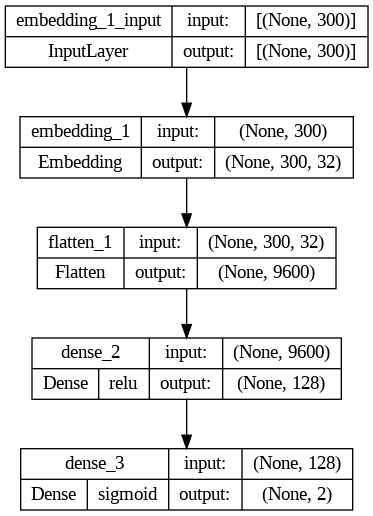

In [ ]:
tf.keras.utils.plot_model(simple_ann_model_imdb,show_shapes=True,dpi=96,show_layer_activations=True)

In [ ]:
simple_ann_model_rt_history = simple_ann_model_rt.fit(X_train_rt, y_train_rt, epochs=total_epochs, validation_data=(X_test_rt, y_test_rt), verbose=1)

# save the history using the pickle
with open('./models/simple_ann_model_rt_history.pickle', 'wb') as handle:
    pickle.dump(simple_ann_model_rt_history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

# save the model
simple_ann_model_rt.save('./models/simple_ann_model_rt.h5')


Epoch 1/10
267/267 [==============================] - 11s 36ms/step - loss: 0.6773 - accuracy: 0.5876 - val_loss: 0.5520 - val_accuracy: 0.7346
Epoch 2/10
267/267 [==============================] - 9s 34ms/step - loss: 0.3679 - accuracy: 0.8410 - val_loss: 0.5262 - val_accuracy: 0.7496
Epoch 3/10
267/267 [==============================] - 8s 31ms/step - loss: 0.0902 - accuracy: 0.9747 - val_loss: 0.7087 - val_accuracy: 0.7304
Epoch 4/10
267/267 [==============================] - 9s 34ms/step - loss: 0.0198 - accuracy: 0.9958 - val_loss: 0.8686 - val_accuracy: 0.7286
Epoch 5/10
267/267 [==============================] - 8s 29ms/step - loss: 0.0067 - accuracy: 0.9991 - val_loss: 0.9606 - val_accuracy: 0.7332
Epoch 6/10
267/267 [==============================] - 10s 37ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 1.0414 - val_accuracy: 0.7309
Epoch 7/10
267/267 [==============================] - 9s 33ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 1.1125 - val_accuracy: 0.73

In [ ]:
# Load the history using the pickle
# with open('./models/simple_ann_model_rt_history.pickle', 'rb') as handle:
#     simple_ann_model_rt_history = pickle.load(handle)

In [ ]:
simple_ann_model_imdb_history = simple_ann_model_imdb.fit(X_train_imdb, y_train_imdb, epochs=total_epochs, validation_data=(X_test_imdb, y_test_imdb), verbose=1)

# save the history using the pickle
with open('./models/simple_ann_model_imdb_history.pickle', 'wb') as handle:
    pickle.dump(simple_ann_model_imdb_history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model
simple_ann_model_imdb.save('./models/simple_ann_model_imdb.h5')

Epoch 1/10
1250/1250 [==============================] - 41s 32ms/step - loss: 0.3505 - accuracy: 0.8377 - val_loss: 0.2745 - val_accuracy: 0.8891
Epoch 2/10
1250/1250 [==============================] - 41s 32ms/step - loss: 0.1021 - accuracy: 0.9636 - val_loss: 0.3728 - val_accuracy: 0.8728
Epoch 3/10
1250/1250 [==============================] - 41s 33ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.5722 - val_accuracy: 0.8663
Epoch 4/10
1250/1250 [==============================] - 42s 33ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.7475 - val_accuracy: 0.8690
Epoch 5/10
1250/1250 [==============================] - 41s 33ms/step - loss: 2.3463e-04 - accuracy: 1.0000 - val_loss: 0.8198 - val_accuracy: 0.8695
Epoch 6/10
1250/1250 [==============================] - 41s 33ms/step - loss: 2.9411e-05 - accuracy: 1.0000 - val_loss: 0.8569 - val_accuracy: 0.8689
Epoch 7/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.3428e-05 - accuracy: 1.0000 - val_lo

In [ ]:
# load the history using the pickle
# with open('./models/simple_ann_model_imdb_history.pickle', 'rb') as handle:
#     simple_ann_model_imdb_history = pickle.load(handle)

67/67 [==============================] - 1s 6ms/step


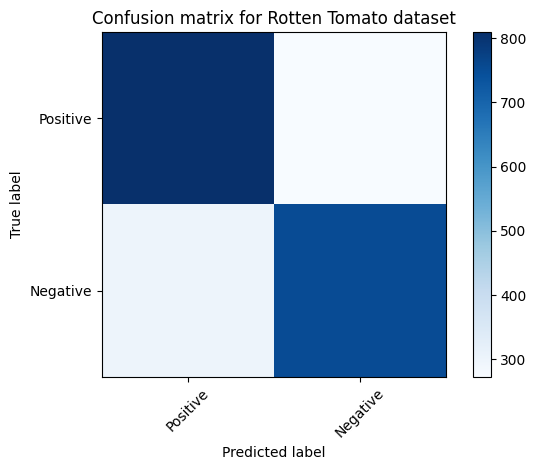

313/313 [==============================] - 2s 7ms/step


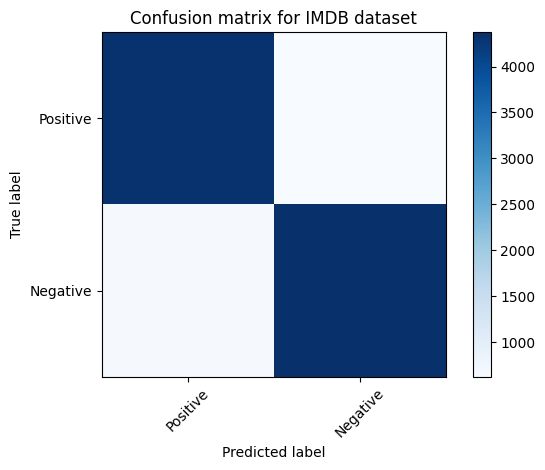

In [ ]:
y_pred_rt = tf.argmax(simple_ann_model_rt.predict(X_test_rt), axis=-1)
y_true_rt = tf.argmax(y_test_rt, axis=-1)

from sklearn.metrics import confusion_matrix

cm_rt = confusion_matrix(y_true_rt, y_pred_rt)

import matplotlib.pyplot as plt
plt.close("all")
plt.imshow(cm_rt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Rotten Tomato dataset')
plt.colorbar()
tick_marks = np.arange(len(classes_rt))
plt.xticks(tick_marks, classes_rt, rotation=45)
plt.yticks(tick_marks, classes_rt)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

y_pred_imdb = tf.argmax(simple_ann_model_imdb.predict(X_test_imdb), axis=-1)
y_true_imdb = tf.argmax(y_test_imdb, axis=-1)

cm_imdb = confusion_matrix(y_true_imdb, y_pred_imdb)

plt.imshow(cm_imdb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for IMDB dataset')
plt.colorbar()
tick_marks = np.arange(len(classes_imdb))
plt.xticks(tick_marks, classes_imdb, rotation=45)
plt.yticks(tick_marks, classes_imdb)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()




In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Obtain the predicted probabilities for each input instance
y_pred_prob_rt = simple_ann_model_rt.predict(X_test_rt)

# Apply a threshold to convert the probabilities to binary labels_rt
y_pred_rt = (y_pred_prob_rt >= 0.5).astype(int)

# Calculate the f1 score
f1_rt = f1_score(y_test_rt, y_pred_rt, average='micro')

# Calculate the precision score
precision_rt = precision_score(y_test_rt, y_pred_rt, average='micro')

# Calculate the recall score
recall_rt = recall_score(y_test_rt, y_pred_rt, average='micro')

# Calculate the accuracy score
accuracy_rt = accuracy_score(np.argmax(y_test_rt, axis=1), np.argmax(y_pred_rt, axis=1))

data_rt.append(["Simpe ANN", f1_rt, precision_rt, recall_rt, accuracy_rt])
# Print the scores
print("Stats for Rotten Tomato dataset")
print('F1 score: {:.4f}'.format(f1_rt))
print("Precision: {:.2f}%".format(precision_rt * 100))
print("Recall Score: {:.2f}".format(recall_rt))
print("Accuracy:", accuracy_rt)

# Obtain the predicted probabilities for each input instance
y_pred_prob_imdb = simple_ann_model_imdb.predict(X_test_imdb)

# Apply a threshold to convert the probabilities to binary labels_rt
y_pred_imdb = (y_pred_prob_imdb >= 0.5).astype(int)

# Calculate the f1 score
f1_imdb = f1_score(y_test_imdb, y_pred_imdb, average='micro')

# Calculate the precision score
precision_imdb = precision_score(y_test_imdb, y_pred_imdb, average='micro')

# Calculate the recall score
recall_imdb = recall_score(y_test_imdb, y_pred_imdb, average='micro')

# Calculate the accuracy score
accuracy_imdb = accuracy_score(np.argmax(y_test_imdb, axis=1), np.argmax(y_pred_imdb, axis=1))

data_imdb.append(["Simpe ANN", f1_imdb, precision_imdb, recall_imdb, accuracy_imdb])
# Print the scores
print("Stats for IMDB dataset")
print('F1 score: {:.4f}'.format(f1_imdb))
print("Precision: {:.2f}%".format(precision_imdb * 100))
print("Recall Score: {:.2f}".format(recall_imdb))
print("Accuracy:", accuracy_imdb)



67/67 [==============================] - 0s 4ms/step
Stats for Rotten Tomato dataset
F1 score: 0.7314
Precision: 73.14%
Recall Score: 0.73
Accuracy: 0.7313642756680732
313/313 [==============================] - 2s 6ms/step
Stats for IMDB dataset
F1 score: 0.8706
Precision: 87.07%
Recall Score: 0.87
Accuracy: 0.8705


In [ ]:
def prediction(model, s, dataset_name):
    sequences = tokenizer.texts_to_sequences([s])
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    x = model.predict(padded)[0]
    if dataset_name == "RottenTomato":
        return classes_rt[np.argmax(x)] + ", Confidence: " + str(x[np.argmax(x)])
    else:
        return classes_imdb[np.argmax(x)] + ", Confidence: " + str(x[np.argmax(x)])

In [ ]:
print(prediction(simple_ann_model_rt, "I love this", "RottenTomato"))

print(prediction(simple_ann_model_imdb, "what a lovely movie", "IMDB"))

1/1 [==============================] - 0s 37ms/step
Negative, Confidence: 0.55527925
1/1 [==============================] - 0s 32ms/step
Negative, Confidence: 0.849606


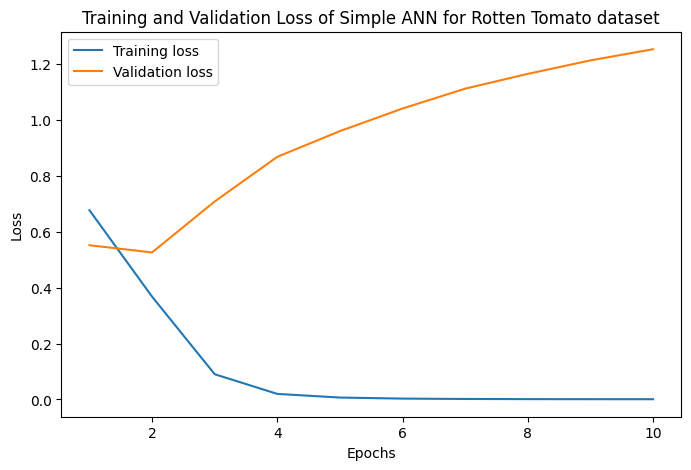

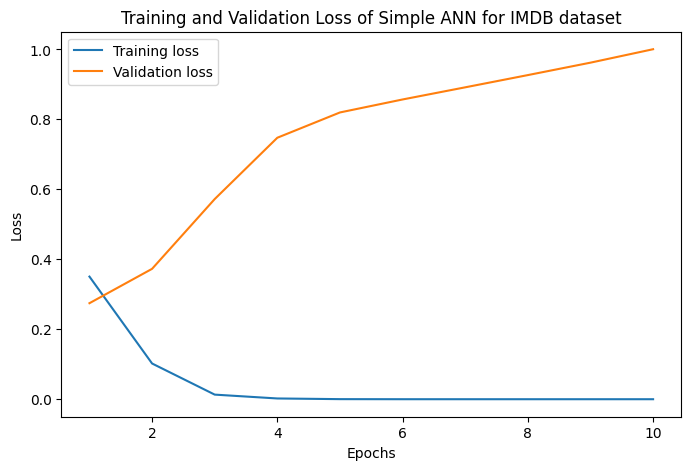

In [ ]:
import matplotlib.pyplot as plt
plt.close('all')
train_loss = simple_ann_model_rt_history.history['loss']
val_loss = simple_ann_model_rt_history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 5))
epochs = range(1, len(train_loss) + 1)
ax.plot(epochs, train_loss, label='Training loss')
ax.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss of Simple ANN for Rotten Tomato dataset')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

train_loss = simple_ann_model_imdb_history.history['loss']
val_loss = simple_ann_model_imdb_history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 5))
epochs = range(1, len(train_loss) + 1)
ax.plot(epochs, train_loss, label='Training loss')
ax.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss of Simple ANN for IMDB dataset')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


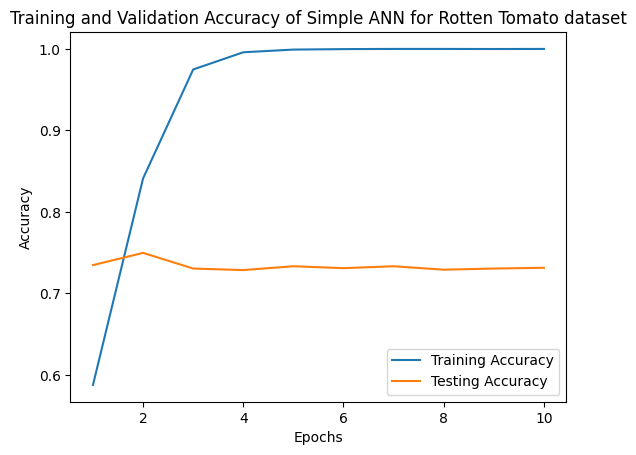

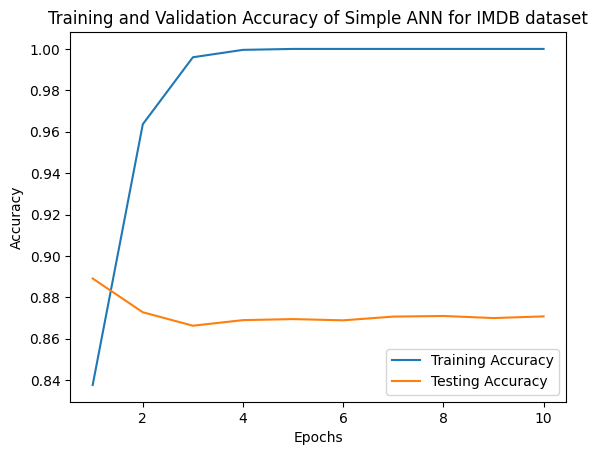

In [ ]:

# Retrieve accuracy values from history object
plt.close('all')

train_acc = simple_ann_model_rt_history.history['accuracy']
test_acc = simple_ann_model_rt_history.history['val_accuracy']

# Retrieve number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and testing accuracy values
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.title('Training and Validation Accuracy of Simple ANN for Rotten Tomato dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retrieve accuracy values from history object
plt.close('all')

train_acc = simple_ann_model_imdb_history.history['accuracy']
test_acc = simple_ann_model_imdb_history.history['val_accuracy']

# Retrieve number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and testing accuracy values
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.title('Training and Validation Accuracy of Simple ANN for IMDB dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




# CNN Model

In [ ]:
from keras.layers import Conv1D,MaxPooling1D,BatchNormalization,Dropout,GlobalMaxPooling1D,Dense
from tensorflow.keras.initializers import RandomNormal, Constant

In [ ]:
# Neural Network architecture

models_rt.append("CNN")

cnn_model_rt = tf.keras.Sequential()

embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)

cnn_model_rt.add(embedding_layer)

cnn_model_rt.add(Conv1D(156, 5, activation='relu'))
cnn_model_rt.add(MaxPooling1D(pool_size=3,strides=1, padding='same'))
cnn_model_rt.add(BatchNormalization(momentum=0.95, epsilon=0.005,beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9)))
cnn_model_rt.add(GlobalMaxPooling1D())
cnn_model_rt.add(Dropout(0.2))
cnn_model_rt.add(Dense(2, activation='sigmoid'))


cnn_model_rt.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Load the entier model
# cnn_model_rt = tf.keras.models.load_model('./models/cnn_model_rt.h5')

print(cnn_model_rt.summary())

models_imdb.append("CNN")

cnn_model_imdb = tf.keras.Sequential()

embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)

cnn_model_imdb.add(embedding_layer)

cnn_model_imdb.add(Conv1D(156, 5, activation='relu'))
cnn_model_imdb.add(MaxPooling1D(pool_size=3,strides=1, padding='same'))
cnn_model_imdb.add(BatchNormalization(momentum=0.95, epsilon=0.005,beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9)))
cnn_model_imdb.add(GlobalMaxPooling1D())
cnn_model_imdb.add(Dropout(0.2))
cnn_model_imdb.add(Dense(2, activation='sigmoid'))


cnn_model_imdb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Load the entier model
# cnn_model_imdb = tf.keras.models.load_model('./models/cnn_model_imdb.h5')

print(cnn_model_imdb.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 32)           960000    
                                                                 
 conv1d_2 (Conv1D)           (None, 296, 156)          25116     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 296, 156)         0         
 1D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 296, 156)         624       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_2 (Glo  (None, 156)              0         
 balMaxPooling1D)                                                
                                                      

In [ ]:
cnn_model_rt_history = cnn_model_rt.fit(X_train_rt, y_train_rt, batch_size = 156, epochs=total_epochs, validation_data=(X_test_rt, y_test_rt))
# save the Rotten Tomato model
cnn_model_rt.save('./models/cnn_model_rt.h5')

# save the histoy using pickle
with open('./models/cnn_model_rt_history.pickle', 'wb') as file_pi:
    pickle.dump(cnn_model_rt_history.history, file_pi)

# load the history using pickle
# with open('./models/cnn_model_rt_history.pickle', 'rb') as file_pi:
#     cnn_model_rt_history = pickle.load(file_pi)

Epoch 1/10
55/55 [==============================] - 29s 507ms/step - loss: 0.6803 - acc: 0.5743 - val_loss: 0.6697 - val_acc: 0.6976
Epoch 2/10
55/55 [==============================] - 29s 530ms/step - loss: 0.4623 - acc: 0.8162 - val_loss: 0.5092 - val_acc: 0.7501
Epoch 3/10
55/55 [==============================] - 30s 546ms/step - loss: 0.2557 - acc: 0.9050 - val_loss: 0.5422 - val_acc: 0.7525
Epoch 4/10
55/55 [==============================] - 30s 545ms/step - loss: 0.1295 - acc: 0.9608 - val_loss: 0.6544 - val_acc: 0.7468
Epoch 5/10
55/55 [==============================] - 28s 513ms/step - loss: 0.0648 - acc: 0.9848 - val_loss: 0.7903 - val_acc: 0.7351
Epoch 6/10
55/55 [==============================] - 29s 529ms/step - loss: 0.0338 - acc: 0.9939 - val_loss: 0.9032 - val_acc: 0.7351
Epoch 7/10
55/55 [==============================] - 29s 522ms/step - loss: 0.0179 - acc: 0.9972 - val_loss: 0.9965 - val_acc: 0.7332
Epoch 8/10
55/55 [==============================] - 36s 654ms/step - 

In [ ]:
cnn_model_imdb_history = cnn_model_imdb.fit(X_train_imdb, y_train_imdb, batch_size = 156, epochs=total_epochs, validation_data=(X_test_imdb, y_test_imdb))

# save the imdb model
cnn_model_imdb.save('./models/cnn_model_imdb.h5')

# save the history using pickel
with open('./models/cnn_model_imdb_history.pickle', 'wb') as handle:
   pickle.dump(cnn_model_rt_history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # load the history using pickle
# with open('./models/cnn_model_imdb_history.pickle', 'rb') as handle:
#    cnn_model_imdb_history = pickle.load(handle)

Epoch 1/10
257/257 [==============================] - 149s 574ms/step - loss: 0.4398 - acc: 0.7831 - val_loss: 0.2836 - val_acc: 0.8864
Epoch 2/10
257/257 [==============================] - 137s 533ms/step - loss: 0.2144 - acc: 0.9171 - val_loss: 0.2510 - val_acc: 0.8986
Epoch 3/10
257/257 [==============================] - 141s 548ms/step - loss: 0.1096 - acc: 0.9638 - val_loss: 0.2749 - val_acc: 0.8917
Epoch 4/10
257/257 [==============================] - 149s 579ms/step - loss: 0.0459 - acc: 0.9879 - val_loss: 0.3177 - val_acc: 0.8945
Epoch 5/10
257/257 [==============================] - 142s 551ms/step - loss: 0.0183 - acc: 0.9965 - val_loss: 0.3615 - val_acc: 0.8892
Epoch 6/10
257/257 [==============================] - 141s 548ms/step - loss: 0.0087 - acc: 0.9988 - val_loss: 0.4012 - val_acc: 0.8921
Epoch 7/10
257/257 [==============================] - 140s 547ms/step - loss: 0.0039 - acc: 0.9996 - val_loss: 0.4476 - val_acc: 0.8887
Epoch 8/10
257/257 [============================

67/67 [==============================] - 5s 64ms/step


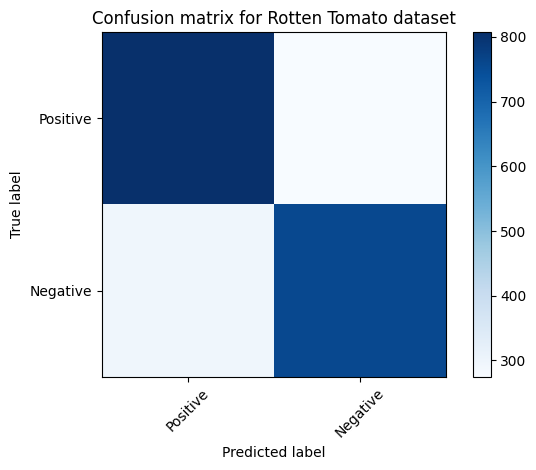

313/313 [==============================] - 9s 27ms/step


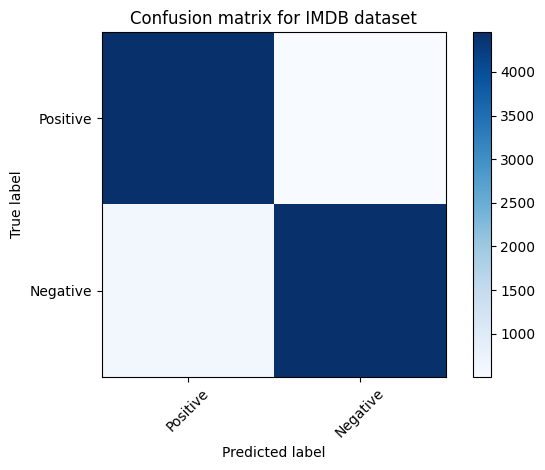

In [ ]:
y_pred_rt = tf.argmax(cnn_model_rt.predict(X_test_rt), axis=-1)
y_true_rt = tf.argmax(y_test_rt, axis=-1)


cm_rt = confusion_matrix(y_true_rt, y_pred_rt)

import matplotlib.pyplot as plt
plt.close("all")
plt.imshow(cm_rt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Rotten Tomato dataset')
plt.colorbar()
tick_marks = np.arange(len(classes_rt))
plt.xticks(tick_marks, classes_rt, rotation=45)
plt.yticks(tick_marks, classes_rt)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

y_pred_imdb = tf.argmax(cnn_model_imdb.predict(X_test_imdb), axis=-1)
y_true_imdb = tf.argmax(y_test_imdb, axis=-1)


cm_imdb = confusion_matrix(y_true_imdb, y_pred_imdb)

import matplotlib.pyplot as plt

plt.close("all")
plt.imshow(cm_imdb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for IMDB dataset')
plt.colorbar()
tick_marks = np.arange(len(classes_imdb))
plt.xticks(tick_marks, classes_imdb, rotation=45)
plt.yticks(tick_marks, classes_imdb)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()



In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Obtain the predicted probabilities for each input instance
y_pred_prob_rt = cnn_model_rt.predict(X_test_rt)

# Apply a threshold to convert the probabilities to binary labels_rt
y_pred_rt = (y_pred_prob_rt >= 0.5).astype(int)

# Calculate the f1 score
f1_rt = f1_score(y_test_rt, y_pred_rt, average='micro')

# Calculate the precision score
precision_rt = precision_score(y_test_rt, y_pred_rt, average='micro')

# Calculate the recall score
recall_rt = recall_score(y_test_rt, y_pred_rt, average='micro')

# Calculate the accuracy score
accuracy_rt = accuracy_score(np.argmax(y_test_rt, axis=1), np.argmax(y_pred_rt, axis=1))

data_rt.append(["CNN", f1_rt, precision_rt, recall_rt, accuracy_rt])


# Print the scores
print("Stats for CNN model on Rotten Tomato dataset")
print('F1 score: {:.4f}'.format(f1_rt))
print("Precision: {:.2f}%".format(precision_rt * 100))
print("Recall Score: {:.2f}".format(recall_rt))
print("Accuracy:", accuracy_rt)

# Obtain the predicted probabilities for each input instance
y_pred_prob_imdb = cnn_model_imdb.predict(X_test_imdb)

# Apply a threshold to convert the probabilities to binary labels_rt
y_pred_imdb = (y_pred_prob_imdb >= 0.5).astype(int)

# Calculate the f1 score
f1_imdb = f1_score(y_test_imdb, y_pred_imdb, average='micro')

# Calculate the precision score
precision_imdb = precision_score(y_test_imdb, y_pred_imdb, average='micro')

# Calculate the recall score
recall_imdb = recall_score(y_test_imdb, y_pred_imdb, average='micro')

# Calculate the accuracy score
accuracy_imdb = accuracy_score(np.argmax(y_test_imdb, axis=1), np.argmax(y_pred_imdb, axis=1))

data_imdb.append(["CNN", f1_imdb, precision_imdb, recall_imdb, accuracy_imdb])


# Print the scores
print("Stats for CNN model on IMDB dataset")
print('F1 score: {:.4f}'.format(f1_imdb))
print("Precision: {:.2f}%".format(precision_imdb * 100))
print("Recall Score: {:.2f}".format(recall_imdb))
print("Accuracy:", accuracy_imdb)



67/67 [==============================] - 1s 17ms/step
Stats for CNN model on Rotten Tomato dataset
F1 score: 0.7335
Precision: 73.28%
Recall Score: 0.73
Accuracy: 0.73370839193624
313/313 [==============================] - 7s 24ms/step
Stats for CNN model on IMDB dataset
F1 score: 0.8885
Precision: 88.76%
Recall Score: 0.89
Accuracy: 0.8879


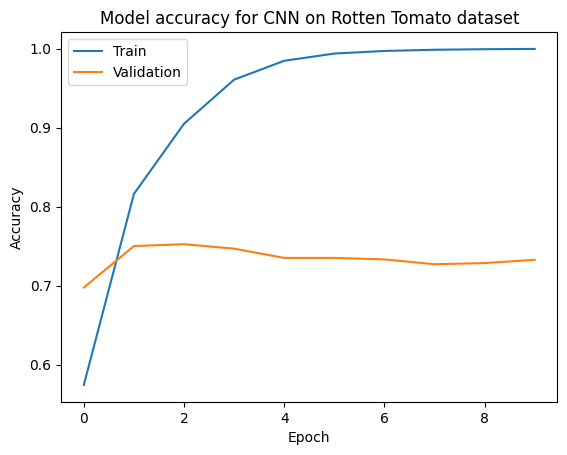

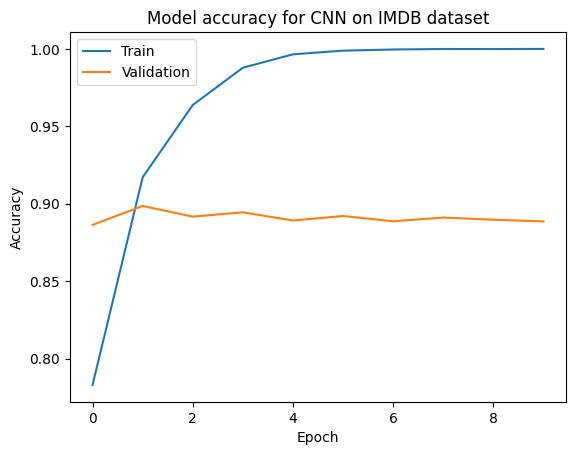

In [ ]:
# Plot the training and validation accuracy over epochs
plt.close('all')
plt.plot(cnn_model_rt_history.history['acc'])
plt.plot(cnn_model_rt_history.history['val_acc'])
plt.title('Model accuracy for CNN on Rotten Tomato dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy over epochs

plt.plot(cnn_model_imdb_history.history['acc'])
plt.plot(cnn_model_imdb_history.history['val_acc'])
plt.title('Model accuracy for CNN on IMDB dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



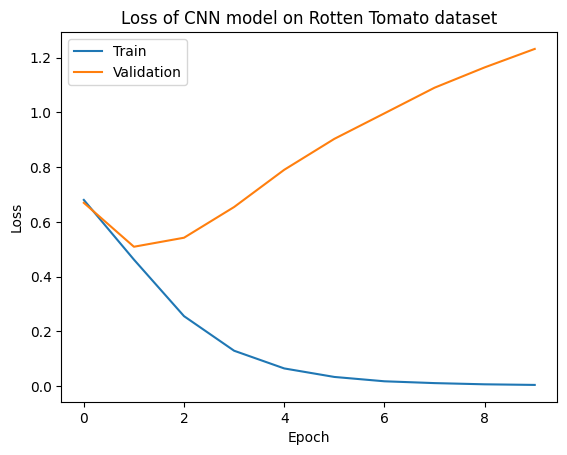

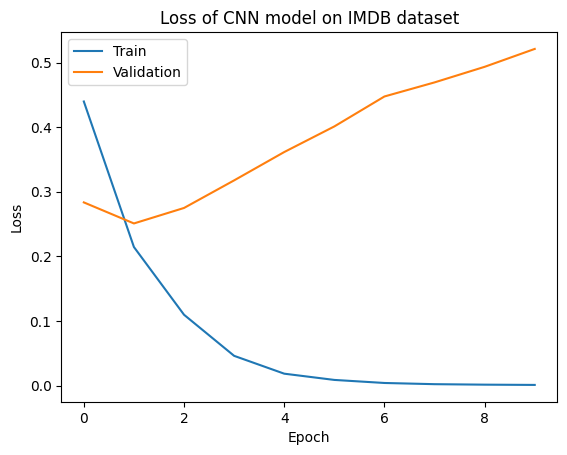

In [ ]:
# Plot the training and validation loss over epochs
plt.close('all')
plt.plot(cnn_model_rt_history.history['loss'])
plt.plot(cnn_model_rt_history.history['val_loss'])
plt.title('Loss of CNN model on Rotten Tomato dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation loss over epochs
plt.plot(cnn_model_imdb_history.history['loss'])
plt.plot(cnn_model_imdb_history.history['val_loss'])
plt.title('Loss of CNN model on IMDB dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




# Results

In [ ]:
train_acc_rt = []
val_acc_rt = []
train_loss_rt = []
val_loss_rt = []

train_acc_imdb = []
val_acc_imdb = []
train_loss_imdb = []
val_loss_imdb = []


train_acc_rt.append(simple_ann_model_rt_history.history['accuracy'])
val_acc_rt.append(simple_ann_model_rt_history.history['val_accuracy'])
train_loss_rt.append(simple_ann_model_rt_history.history['loss'])
val_loss_rt.append(simple_ann_model_rt_history.history['val_loss'])

train_acc_rt.append(cnn_model_rt_history.history['acc'])
val_acc_rt.append(cnn_model_rt_history.history['val_acc'])
train_loss_rt.append(cnn_model_rt_history.history['loss'])
val_loss_rt.append(cnn_model_rt_history.history['val_loss'])

train_acc_imdb.append(simple_ann_model_imdb_history.history['accuracy'])
val_acc_imdb.append(simple_ann_model_imdb_history.history['val_accuracy'])
train_loss_imdb.append(simple_ann_model_imdb_history.history['loss'])
val_loss_imdb.append(simple_ann_model_imdb_history.history['val_loss'])

train_acc_imdb.append(cnn_model_imdb_history.history['acc'])
val_acc_imdb.append(cnn_model_imdb_history.history['val_acc'])
train_loss_imdb.append(cnn_model_imdb_history.history['loss'])
val_loss_imdb.append(cnn_model_imdb_history.history['val_loss'])


In [ ]:

simple_ann_model_rt_history.history['accuracy']



[0.5876421332359314,
 0.8410130143165588,
 0.974674642086029,
 0.9957790970802307,
 0.9990620017051697,
 0.9996482729911804,
 0.9998827576637268,
 0.9998827576637268,
 0.9997655153274536,
 0.9998827576637268]

In [ ]:
simple_ann_model_rt_history.history['val_accuracy']


[0.7346460223197937,
 0.74964839220047,
 0.7304266095161438,
 0.7285513281822205,
 0.7332395911216736,
 0.730895459651947,
 0.7332395911216736,
 0.7290201783180237,
 0.7304266095161438,
 0.7313642501831055]

In [ ]:
simple_ann_model_rt_history.history['loss']


[0.6772715449333191,
 0.3678509593009949,
 0.09022064507007599,
 0.019762789830565453,
 0.0067030093632638454,
 0.002966692205518484,
 0.0016289993654936552,
 0.0010840146569535136,
 0.0008678835583850741,
 0.000739984679967165]

In [ ]:
simple_ann_model_rt_history.history['val_loss']

[0.5520403385162354,
 0.5262414216995239,
 0.7086979150772095,
 0.8685727715492249,
 0.9605703353881836,
 1.0414190292358398,
 1.1125296354293823,
 1.1654857397079468,
 1.2137013673782349,
 1.253657341003418]

In [ ]:
simple_ann_model_imdb_history.history['accuracy']


[0.8377000093460083,
 0.9636250138282776,
 0.9959750175476074,
 0.9995499849319458,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
simple_ann_model_imdb_history.history['val_accuracy']


[0.8891000151634216,
 0.8727999925613403,
 0.8662999868392944,
 0.8690000176429749,
 0.8694999814033508,
 0.8689000010490417,
 0.8707000017166138,
 0.8709999918937683,
 0.8700000047683716,
 0.8708000183105469]

In [ ]:
simple_ann_model_imdb_history.history['loss']


[0.3505356013774872,
 0.10211959481239319,
 0.013157646171748638,
 0.002160398056730628,
 0.00023462755780201405,
 2.941050479421392e-05,
 1.3427745216176845e-05,
 7.4141466939181555e-06,
 4.004069069196703e-06,
 2.118928250638419e-06]

In [ ]:
simple_ann_model_imdb_history.history['val_loss']

[0.2745254337787628,
 0.37278592586517334,
 0.572237491607666,
 0.7475461363792419,
 0.8198378682136536,
 0.8569410443305969,
 0.8916682600975037,
 0.9266372919082642,
 0.9621754884719849,
 1.000593900680542]

In [ ]:
cnn_model_rt_history.history['acc']


[0.5742759704589844,
 0.8161566257476807,
 0.9050298929214478,
 0.9608395099639893,
 0.9847579002380371,
 0.9939031600952148,
 0.9971860647201538,
 0.9987102746963501,
 0.999413788318634,
 0.9997655153274536]

In [ ]:
cnn_model_rt_history.history['val_acc']


[0.697609007358551,
 0.7501171827316284,
 0.752461314201355,
 0.746835470199585,
 0.7351148724555969,
 0.7351148724555969,
 0.7332395911216736,
 0.7271448373794556,
 0.7285513281822205,
 0.7327707409858704]

In [ ]:
cnn_model_rt_history.history['loss']


[0.6802687048912048,
 0.46228858828544617,
 0.255718469619751,
 0.12946589291095734,
 0.06484702229499817,
 0.03375433385372162,
 0.01787448860704899,
 0.011238904669880867,
 0.006849560420960188,
 0.004610961768776178]

In [ ]:
cnn_model_rt_history.history['val_loss']

[0.6696668267250061,
 0.5092468857765198,
 0.5421964526176453,
 0.6543994545936584,
 0.7902872562408447,
 0.9032191634178162,
 0.996467113494873,
 1.0900720357894897,
 1.164211630821228,
 1.2317150831222534]

In [ ]:
cnn_model_imdb_history.history['acc']


[0.783050000667572,
 0.9171249866485596,
 0.9637749791145325,
 0.98785001039505,
 0.9965000152587891,
 0.9988499879837036,
 0.9995999932289124,
 0.9999250173568726,
 0.999875009059906,
 0.9999750256538391]

In [ ]:
cnn_model_imdb_history.history['val_acc']


[0.8863999843597412,
 0.8985999822616577,
 0.891700029373169,
 0.8945000171661377,
 0.88919997215271,
 0.8920999765396118,
 0.888700008392334,
 0.8910999894142151,
 0.8896999955177307,
 0.8885999917984009]

In [ ]:
cnn_model_imdb_history.history['loss']


[0.4397989809513092,
 0.21444694697856903,
 0.10959124565124512,
 0.045941971242427826,
 0.01832462288439274,
 0.008653851225972176,
 0.0039218030869960785,
 0.002069035079330206,
 0.0013210823526605964,
 0.0009143704664893448]

In [ ]:
cnn_model_imdb_history.history['val_loss']

[0.28355830907821655,
 0.25095322728157043,
 0.27493777871131897,
 0.3176511824131012,
 0.3615189790725708,
 0.4011809527873993,
 0.4475610852241516,
 0.46936824917793274,
 0.49348700046539307,
 0.5212085843086243]

In [ ]:


accuracy_rt = []
accuracy_rt.append(max(simple_ann_model_rt_history.history['val_accuracy']))
accuracy_rt.append(max(cnn_model_rt_history.history['val_acc']))

# Sample data
accuracy_rt = np.array(accuracy_rt)

# Convert to percent with one decimal place
accuracy_rt = np.round(accuracy_rt * 100, 1)

metrics = pd.DataFrame({
    'Model': models_rt,
    'Accuracy': accuracy_rt,
})

# Set Model column as index
metrics = metrics.set_index('Model')

# Display DataFrame
print(metrics)


accuracy_imdb = []
accuracy_imdb.append(max(simple_ann_model_imdb_history.history['val_accuracy']))
accuracy_imdb.append(max(cnn_model_imdb_history.history['val_acc']))


# Sample data
accuracy_imdb = np.array(accuracy_imdb)

# Convert to percent with one decimal place
accuracy_imdb = np.round(accuracy_imdb * 100, 1)

metrics = pd.DataFrame({
    'Model': models_imdb,
    'Accuracy': accuracy_imdb,
})

# Set Model column as index
metrics = metrics.set_index('Model')

# Display DataFrame
print(metrics)



ValueError: ignored

ValueError: ignored

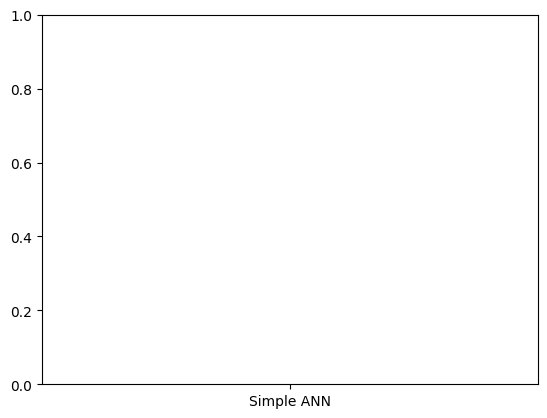

In [ ]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.close('all')
colors = ['#FFC300', '#FF5733', '#C70039']
plt.bar(models_rt, accuracy_rt, color=colors)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels_twitter
plt.title('Model Accuracies for Rotten Tomato dataset')
plt.xlabel('Models Rotten Tomato')
plt.ylabel('Accuracy')

# Add value labels_twitter on top of each bar
for i, v in enumerate(accuracy_rt):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()


# Create a bar chart
plt.close('all')
colors = ['#FFC300', '#FF5733', '#C70039']
plt.bar(models_imdb, accuracy_imdb, color=colors)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels_twitter
plt.title('Model Accuracies for IMDB dataset')
plt.xlabel('Models IMDB')
plt.ylabel('Accuracy')

# Add value labels_twitter on top of each bar
for i, v in enumerate(accuracy_imdb):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()


In [ ]:
bilstm_model_twit_history.history['accuracy']

[0.8571659326553345,
 0.9587974548339844,
 0.9673351049423218,
 0.9730156660079956,
 0.9769349098205566,
 0.980000376701355,
 0.98272305727005,
 0.9841885566711426]

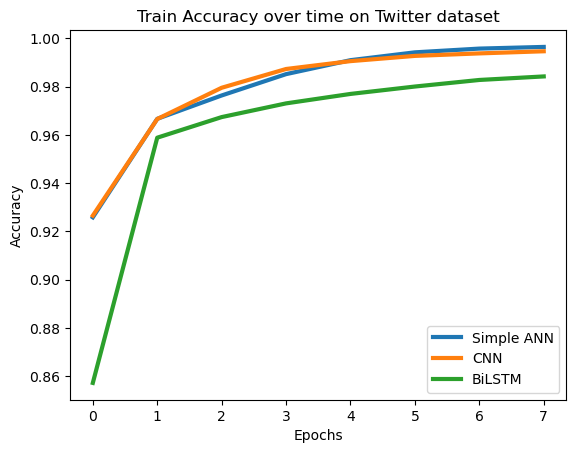

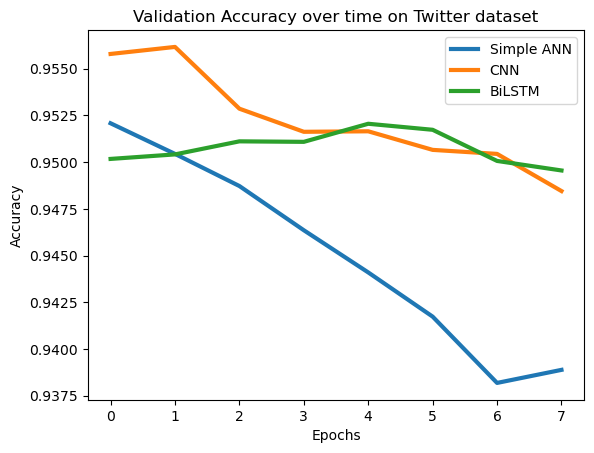

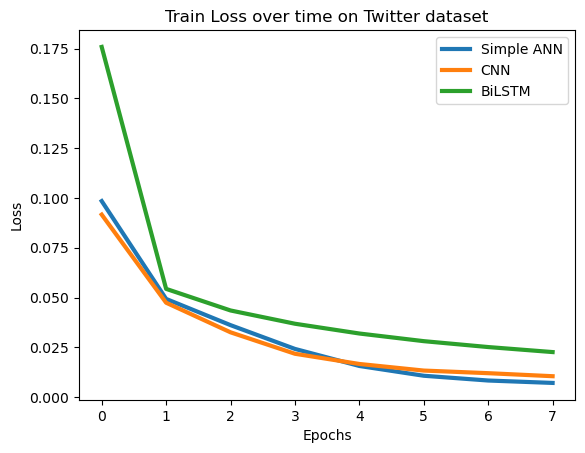

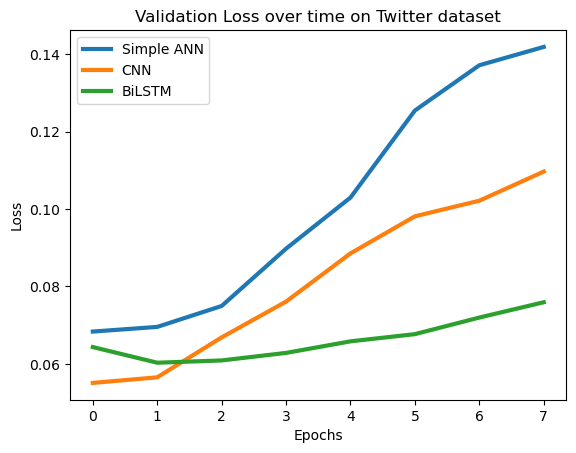

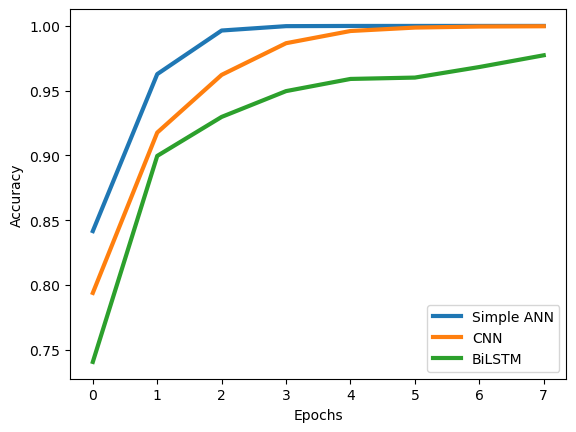

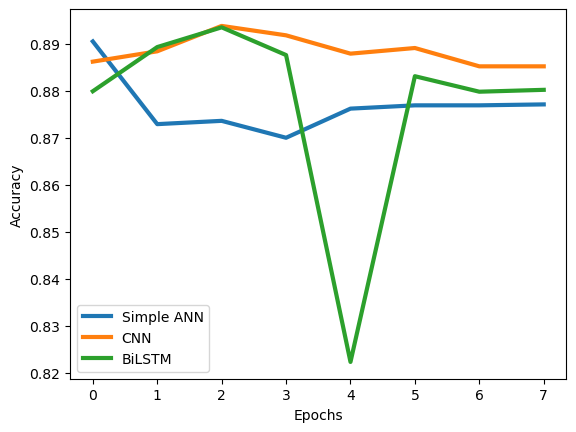

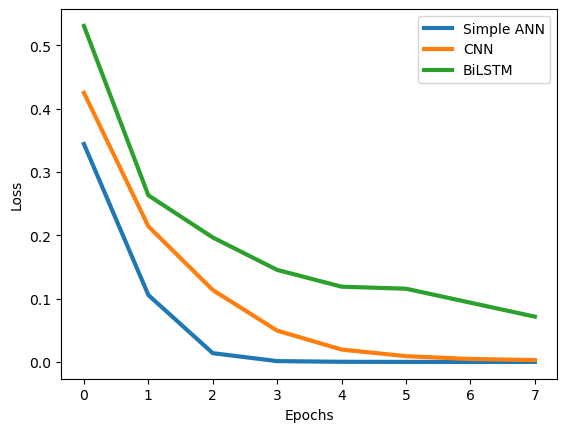

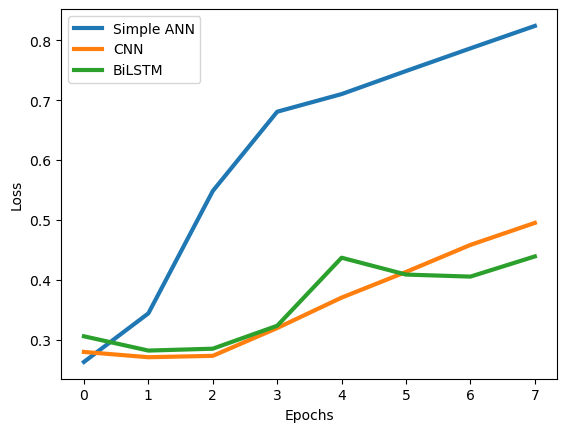

In [ ]:
plt.close('all')

# Create the plot for train accuracy
x = range(len(train_acc_twit[0]))
# print(x)
# sys.exit()
fig1 = plt.figure()
plt.plot(x, train_acc_twit[0], label="Simple ANN", linewidth=3)
plt.plot(x, train_acc_twit[1], label="CNN", linewidth=3)
plt.plot(x, train_acc_twit[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy over time on Twitter dataset')


# Create the plot for validation accuracy
fig2 = plt.figure()
plt.plot(x, val_acc_twit[0], label="Simple ANN", linewidth=3)
plt.plot(x, val_acc_twit[1], label="CNN", linewidth=3)
plt.plot(x, val_acc_twit[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over time on Twitter dataset')

# Create the plot for train loss
fig3 = plt.figure()
plt.plot(x, train_loss_twit[0], label="Simple ANN", linewidth=3)
plt.plot(x, train_loss_twit[1], label="CNN", linewidth=3)
plt.plot(x, train_loss_twit[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss over time on Twitter dataset')

# Create the plot for validation loss
fig4 = plt.figure()
plt.plot(x, val_loss_twit[0], label="Simple ANN", linewidth=3)
plt.plot(x, val_loss_twit[1], label="CNN", linewidth=3)
plt.plot(x, val_loss_twit[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over time on Twitter dataset')

# Show all the plots
plt.show()



plt.close('all')

# Create the plot for train accuracy
x = range(len(train_acc_imdb[0]))
# print(x)
# sys.exit()
fig1 = plt.figure()
plt.plot(x, train_acc_imdb[0], label="Simple ANN", linewidth=3)
plt.plot(x, train_acc_imdb[1], label="CNN", linewidth=3)
plt.plot(x, train_acc_imdb[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Create the plot for validation accuracy
fig2 = plt.figure()
plt.plot(x, val_acc_imdb[0], label="Simple ANN", linewidth=3)
plt.plot(x, val_acc_imdb[1], label="CNN", linewidth=3)
plt.plot(x, val_acc_imdb[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Create the plot for train loss
fig3 = plt.figure()
plt.plot(x, train_loss_imdb[0], label="Simple ANN", linewidth=3)
plt.plot(x, train_loss_imdb[1], label="CNN", linewidth=3)
plt.plot(x, train_loss_imdb[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')


# Create the plot for validation loss
fig4 = plt.figure()
plt.plot(x, val_loss_imdb[0], label="Simple ANN", linewidth=3)
plt.plot(x, val_loss_imdb[1], label="CNN", linewidth=3)
plt.plot(x, val_loss_imdb[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')


# Show all the plots
plt.show()


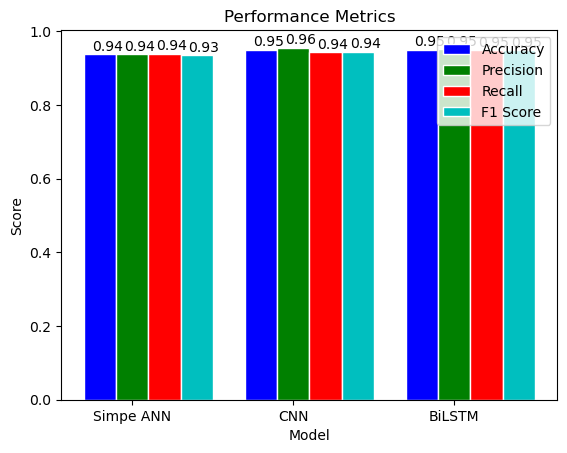

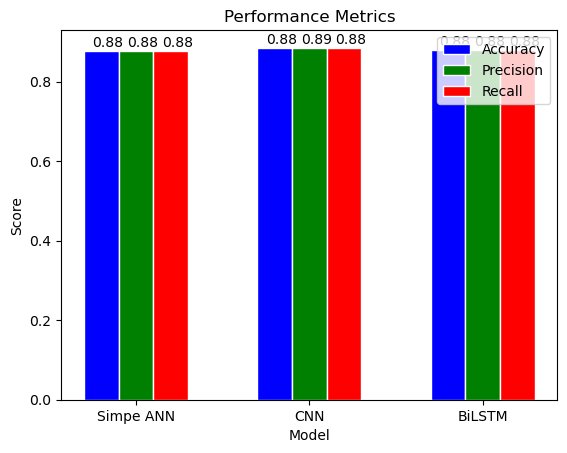

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# example data
# data = [
#     ('Model A', 0.9, 0.8, 0.7, 0.75),
#     ('Model B', 0.8, 0.75, 0.85, 0.8),
#     ('Model C', 0.7, 0.65, 0.75, 0.7)
# ]

# extract the accuracy, precision, recall, and f1 values for each model
accuracy_twit = [x[1] for x in data_twit]
precision_twit = [x[2] for x in data_twit]
recall_twit = [x[3] for x in data_twit]
f1_twit = [x[4] for x in data_twit]

# set the width of the bars
barWidth = 0.2

# set the positions of the bars on the x-axis
r1 = np.arange(len(data_twit))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# create the bar chart
plt.bar(r1, accuracy_twit, color='b', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_twit, color='g', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recall_twit, color='r', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, f1_twit, color='c', width=barWidth, edgecolor='white', label='F1 Score')

# add labels_twitter and titles
plt.xlabel('Model')
plt.xticks([r + barWidth for r in range(len(data_twit))], [x[0] for x in data_twit])
plt.ylabel('Score')
plt.title('Performance Metrics')

# add legend
plt.legend()

# add text labels_twitter above each bar
for i in range(len(data_twit)):
    plt.text(r1[i] - 0.05, accuracy_twit[i] + 0.01, '{:.2f}'.format(accuracy_twit[i]), fontsize=10)
    plt.text(r2[i] - 0.05, precision_twit[i] + 0.01, '{:.2f}'.format(precision_twit[i]), fontsize=10)
    plt.text(r3[i] - 0.05, recall_twit[i] + 0.01, '{:.2f}'.format(recall_twit[i]), fontsize=10)
    plt.text(r4[i] - 0.05, f1_twit[i] + 0.01, '{:.2f}'.format(f1_twit[i]), fontsize=10)

# show the plot
plt.show()



# extract the accuracy, precision, recall, and f1 values for each model
accuracy_imdb = [x[1] for x in data_imdb]
precision_imdb = [x[2] for x in data_imdb]
recall_imdb = [x[3] for x in data_imdb]

# set the width of the bars
barWidth = 0.2

# set the positions of the bars on the x-axis
r1 = np.arange(len(data_imdb))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# create the bar chart
plt.bar(r1, accuracy_imdb, color='b', width=barWidth, edgecolor='white', label='Accuracy')

plt.bar(r2, precision_imdb, color='g', width=barWidth, edgecolor='white', label='Precision')

plt.bar(r3, recall_imdb, color='r', width=barWidth, edgecolor='white', label='Recall')

# add labels_twitter and titles
plt.xlabel('Model')
plt.xticks([r + barWidth for r in range(len(data_imdb))], [x[0] for x in data_imdb])
plt.ylabel('Score')
plt.title('Performance Metrics')

# add legend
plt.legend()

# add text labels_twitter above each bar
for i in range(len(data_imdb)):
    plt.text(r1[i] - 0.05, accuracy_imdb[i] + 0.01, '{:.2f}'.format(accuracy_imdb[i]), fontsize=10)
    plt.text(r2[i] - 0.05, precision_imdb[i] + 0.01, '{:.2f}'.format(precision_imdb[i]), fontsize=10)
    plt.text(r3[i] - 0.05, recall_imdb[i] + 0.01, '{:.2f}'.format(recall_imdb[i]), fontsize=10)

# show the plot
plt.show()


